#### Week2 Experiment2 - Balancing data
### Summary: 
Week1: Logistic regression with L1,L2 and ElasticNet regulariisation <br>
Kaggle result: 0.70770 (for L2) 

Week2 Exp1: Data cleaning - removing negative values <br>
Much less AUC than week1 - therefore, negative valued will be used in further model experiments.
Kaggle result: 0.70677

Week2 Exp2: Balancing datasets (using SMOTE), analysing which class performs better using confusion matrix
AUC - 0.7349 
Kaggle result: 0.708


### 1. Import packages and data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

from imblearn.combine import SMOTEENN

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading training dataset 
df_train_original = pd.read_csv('../data/raw/train.csv')
df_test_original = pd.read_csv('../data/raw/test.csv')

### 2. Data analysis 
Summary: <br>
1) There are negative values for Games played (GP), 3 Point attempts (3PMade), 3 Point attempts, 3P%, FT%, BLK (Blocks) <br>
2) The dataset for the dependant variable is imnbalanced. The plot shows that the dataset is not balanced. There are more 1's for Target_5yrs than 0. 


In [4]:
#exploration 
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [5]:
#df_train_original.hist(figsize=(15,30),layout=(9,3))

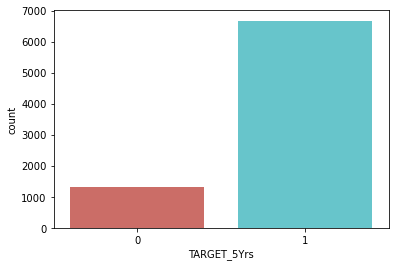

In [6]:
sns.countplot(x='TARGET_5Yrs',data=df_train_original, palette='hls')
plt.show()

In [84]:
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


### 3.Predictions

In [7]:
# Save target variable
target = df_train_original.pop('TARGET_5Yrs')

In [8]:
#dropping off Ids
df_train_original.drop(['Id','Id_old'], axis=1, inplace=True)

#dropping off correlated fields : for example FG% (Field goals percent), 3P% (3 Point Attempts), FT% (Free Throw Percent),REB(Rebounds)
#df_train_original.drop(['FG%','3P%','FT%'], axis=1, inplace=True)

In [9]:
#feature scaling
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train_original)

from joblib import dump
#Save the scaler into the folder models and call the file scaler.joblib
dump(scaler, '../models/scaler.joblib')



['../models/scaler.joblib']

In [10]:
#Splitting the training data (80%) randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

x_train, x_val, y_train, y_val = train_test_split(df_train, target, test_size=0.2, random_state=8)

#save models 
np.save('../data/processed/X_train', x_train)
np.save('../data/processed/X_val',   x_val)
np.save('../data/processed/y_train', y_train)
np.save('../data/processed/y_val',   y_val)


['../models/logistic_l2.joblib']

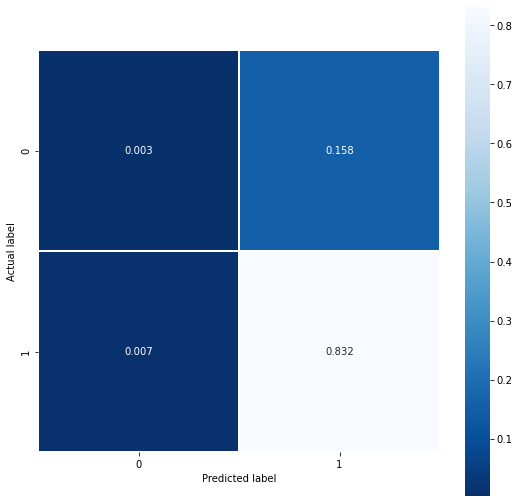

In [11]:
#LR2 - regularisation
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')
lr_l2.fit(x_train, y_train)
y_val_preds_l2 = lr_l2.predict(x_val)
y_val_preds_prob_l2 = lr_l2.predict_proba(x_val)

#Confusion matrix
cm = confusion_matrix(y_val, y_val_preds_l2,normalize='all')

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#save model as logistic 
dump(lr_l2,  '../models/logistic_l2.joblib')

In the Confusion matrix, we can see that 15% of class 0 is predicted as 1. 

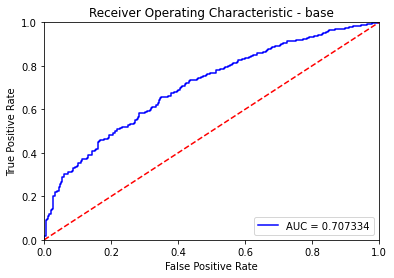

In [70]:
#AUC_ROC
preds_l2 = y_val_preds_prob_l2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_l2)
roc_auc_l2 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_l2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
np.round(lr_l2.coef_,1)

array([[ 0.5,  0.1, -0.1,  0.2, -0.1,  0.2,  0.7, -0.6,  0. , -0.2,  0.3,
         0.1,  0.5,  0.3, -0.6,  0.2, -0. ,  0.1, -0.1]])

### 5. Imbalanced data

In [90]:
 # transform the dataset
smote_enn = SMOTEENN(random_state=0)
 X_resampled_o, y_resampled = smote_enn.fit_resample(df_train_original,target)

In [91]:
 X_resampled_o.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,...,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000,6346.000000
mean,6724.222030,7741.590451,57.805862,16.526552,6.282789,2.415588,5.486767,43.476159,0.256890,0.806601,...,1.196893,1.672198,71.057537,0.918769,1.882096,2.800148,1.442515,0.580338,0.131361,1.115593
std,3969.980888,2286.115710,16.337288,7.845321,3.727267,1.454295,3.093395,5.736329,0.357232,0.986621,...,0.813302,1.090224,9.701889,0.679608,1.215225,1.814726,1.174290,0.359695,0.955535,0.630514
min,4.000000,3800.000000,-3.000000,2.900000,0.800000,0.300000,0.800000,25.600000,-1.100000,-3.100000,...,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000
25%,3270.250000,5750.500000,47.000000,11.000000,3.600000,1.400000,3.285630,39.690128,0.000000,0.168158,...,0.600000,0.900000,65.000000,0.425181,1.004527,1.500683,0.600000,0.300000,0.015000,0.689121
50%,6630.000000,7684.000000,57.000000,14.987035,5.400000,2.076374,4.799468,43.259672,0.258624,0.800000,...,1.000000,1.424911,71.019596,0.789598,1.600000,2.400000,1.158392,0.500000,0.200000,1.000000
75%,10162.000000,9694.750000,68.000000,20.300000,8.000000,3.100000,6.918481,47.247714,0.500000,1.451689,...,1.600000,2.200000,77.000000,1.200000,2.408415,3.600000,1.900000,0.748425,0.300000,1.400000
max,13798.000000,11797.000000,121.000000,73.800000,32.100000,12.800000,27.100000,67.200000,1.700000,4.700000,...,7.200000,9.700000,132.500000,5.400000,11.000000,15.900000,10.700000,3.500000,14.500000,4.900000


In [92]:
print(sorted(Counter(y_resampled).items()))

[(0, 3685), (1, 2661)]


In [97]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled_o, y_resampled = smote_tomek.fit_resample(df_train_original,target)
print(sorted(Counter(y_resampled).items()))

[(0, 5976), (1, 5976)]


#### SMOTETomek has equal values for both 0 and 1

In [98]:
X_resampled = X_resampled_o.drop(['Id','Id_old'], axis=1)
X_resampled.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000
mean,58.932313,17.107180,6.561729,2.527828,5.702891,43.766014,0.260556,0.815362,19.832518,1.248409,1.748382,71.009794,0.957530,1.960388,2.918863,1.500424,0.600548,0.174888,1.156328
std,16.554265,8.185272,3.922248,1.531792,3.251493,5.833198,0.358449,0.989856,15.100469,0.845439,1.138439,9.780964,0.707856,1.263427,1.890693,1.226665,0.370685,0.863706,0.657309
min,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000
25%,48.000000,11.200000,3.734368,1.400000,3.369984,39.800000,0.000000,0.165808,9.700000,0.621166,0.900000,65.000000,0.458840,1.061124,1.584243,0.620437,0.312387,0.041246,0.700000
50%,58.000000,15.424422,5.600000,2.164981,4.900000,43.504100,0.269063,0.800000,19.700000,1.047683,1.500000,71.000000,0.800000,1.670716,2.500000,1.200000,0.500000,0.200000,1.000000
75%,70.000000,21.297788,8.432075,3.211149,7.200000,47.514757,0.500000,1.485547,29.700340,1.700000,2.300000,76.900000,1.300000,2.516751,3.800000,2.000000,0.800000,0.300000,1.500000
max,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000


In [99]:
#Using resampled values for further prediction 
#feature scaling
scaler = StandardScaler()
df_train_resampled = scaler.fit_transform(X_resampled)

from joblib import dump
#Save the scaler into the folder models and call the file scaler.joblib
dump(scaler, '../models/scaler.joblib')


#Splitting the training data (80%) randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)
x_train_resampled, x_val_resampled, y_train_resampled, y_val_resampled = train_test_split(df_train_resampled, y_resampled, test_size=0.2, random_state=8)

#save models 
np.save('../data/processed/y_resampled', x_train_resampled)
np.save('../data/processed/x_val_resampled',   x_val_resampled)
np.save('../data/processed/y_trainresampled', y_train_resampled)
np.save('../data/processed/y_valresampled',   y_val_resampled)


['../models/lr_l2_resampled.joblib']

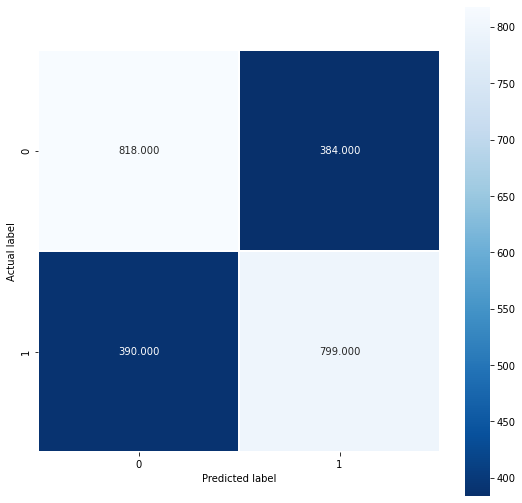

In [100]:
#LR2 - regularisation
lr_l2_resampled = LogisticRegression(penalty='l2', solver='liblinear')
lr_l2_resampled.fit(x_train_resampled, y_train_resampled)
y_val_preds_l2_resampled = lr_l2_resampled.predict(x_val_resampled)
y_val_preds_prob_l2_resampled = lr_l2_resampled.predict_proba(x_val_resampled)

#Confusion matrix
cm_resampled = confusion_matrix(y_val_resampled, y_val_preds_l2_resampled)

plt.figure(figsize=(9,9))
sns.heatmap(cm_resampled, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#save model as logistic 
dump(lr_l2,  '../models/lr_l2_resampled.joblib')

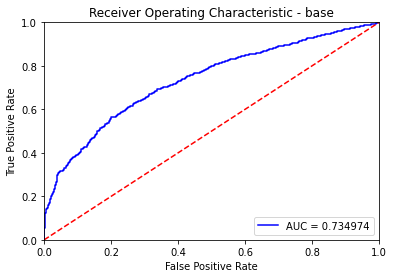

In [101]:
#AUC_ROC
preds_l2_resampled = y_val_preds_prob_l2_resampled[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val_resampled, preds_l2_resampled)
roc_auc_l2 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_l2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Week1: AUC ROC for all the model <br>
0 - Logistic regression - 0.706288 <br>
1 - Logistic with L1 regularisation - 0.705935 <br>
2 - Logistic with L2 regularisation - 0.706100  <br>
3 - Logistic with elastic net - 0.705746 <br>
4 - Logistic with elastic and L1 ratio -0.705682 <br>

Week2 Exp1: AUC ROC for all the model (after removing negative values): <br>
0 - Logistic regression - 0.65851 <br>
1 - Logistic with L1 regularisation - 0.6853 <br>
2 - Logistic with L2 regularisation - 0.6850  <br>
3 - Logistic with elastic net - 0.6859 <br>
4 - Logistic with elastic and L1 ratio - 0.6860 <br>

Week2 Exp2: Logistic regression with L2 - SMOTE to address imbalanced data 
Logistic with L2 regularisation on resampled data - 0.7349

### 5. Applying Prediction to test data

In [197]:
#using L2 to predict test set 
#standardising test data 

df_test = df_test_original.drop(['Id','Id_old'], axis=1)
df_test = scaler.fit_transform(df_test)
y_test = lr_l2.predict_proba(df_test)

final_pred =pd.DataFrame(y_test[:,1], index=df_test_original['Id'])
final_pred.rename( columns={0 :'TARGET_5Yrs'}, inplace=True )
final_pred.to_csv('../data/processed/Week2Exp2.csv' )


In [200]:
#using L1 to predict test set 
#standardising test data 

df_test = df_test_original.drop(['Id','Id_old'], axis=1)
df_test = scaler.fit_transform(df_test)
y_test_lr = lr.predict_proba(df_test)

final_pred =pd.DataFrame(y_test_lr[:,1], index=df_test_original['Id'])
final_pred.rename( columns={0 :'TARGET_5Yrs'}, inplace=True )
final_pred.to_csv('../data/processed/Week2LR.csv' )

In [110]:
#using L2 resampled model 
#standardising test data 

df_test = df_test_original.drop(['Id','Id_old'], axis=1)
df_test = scaler.fit_transform(df_test)
y_test_lr2_resampled = lr_l2_resampled.predict_proba(df_test)

final_pred =pd.DataFrame(y_test_lr2_resampled[:,1], index=df_test_original['Id'])
final_pred.rename( columns={0 :'TARGET_5Yrs'}, inplace=True )
final_pred.to_csv('../data/processed/Week2LR2_resampled1.csv' )